# C# Введение

## Solution / Project
Базовые кирпичики нашего продукта.

![](2024-02-12-21-34-01.png)

Ссылка на проект

![](2024-02-12-21-50-31.png)

## Classes / Structs

### Classes

```c#
public class Person
{
    public int Name;
}
```

### Nested Classes

```c#
public class Person
{
    public int Name;

    public class Adress
    {
        public int HouseNumber;
        public string StreetName;
    }
}
```

Модификаторы доступа для классов:

* public - доступный класс для всех классов из сборок, которые ссылаются на сборку, в котором определен этот класс.
* private - модификатор, доступный только в контексте вложенного класса.
* internal - класс доступен только для классов из сборки, в которой он определен.

Помимо модификаторов доступа есть другие:

* abstract - класс может содержать в себе pure virtual метод.
* sealed - от этого класса нельзя унаследоваться.
* partial - нужен для того, чтобы компилятор понимал, что код может быть раскидан по нескольким файлам.




## Поля и свойства классов

У полей есть следующие модификаторы доступа:

* public, private, protected - все и так понятно
* protected internal, private protected - никогда это не использовал, и наврядли буду

Еще есть такие модификаторы:

* readonly - означает, что поле можно назначить только в конструкторе или по месту объявления.
* static - статическое поле.
* const - делает поле константным.

### Свойства

Использовать поля в дотнете считается олдскулом, и лучше всего писать свойства.

```c#
public class Region
{
    public int Area { get; set; }
}

public class RegionPrivateSetter
{
    public int Area { get; private set; }
}

public class RegionPrivateAll
{
    private int Area { get; set; }
}

public class RegionBroken
{
    private int Area { public get; set; }
}

public class RegionProtected
{
    protected int Area { get; private set; }
}
```

## Методы

Тут ничего нового, есть просто методы, а есть:

* abstract - функции без реализации, могут быть только в абстрактных классах. При наследовании мы должны их обязательно определить (либо сделать сам класс тоже абстрактным). Для переопределения должен использоваться модификатор override.
```c#
public abstract class B
{
    public abstract void method1();
}

public abstract class BOther : B
{
    public override void method1()
    {
        // Do something
    }
}
```
* static - статические методы. Могут использовать только статические методы и статические поля\свойства.
```c#
public class C
{
    int F;
    static int FStatic;

    public static void CC()
    {
        int copy = FStatic;
        // int copy = F; Error
    }
}
```
* virtual - допускают полиморфное переопределение. Для переопределения опять же используется модификатор override
```c#
public class B
{
    public virtual void Method()
    {
        Console.WriteLine("From B");
    }
}

public class BOther : B
{
    public override void Method()
    {
        Console.WriteLine("From BOther");
    }
}

public class BOtherSecond : B
{
    public void Method()
    {
        Console.WriteLine("From BOtherSecond");
    }
}
```

***Вопрос*** Будет ли ошибка?

<details>
<summary>Ответ</summary>

Ошибки не будет, но будет предупреждение что мы спрятали метод. Нам предложат очевидный override, или пометить что метод спрятан через модификатор new

```c#
public class BOtherSecond : B
{
    public new void Method()
    {
        Console.WriteLine("From BOtherSecond");
    }
}

...

var b = new B(); b.Method(); // From B
var bOther = new BOther(); bOther.Method(); // From BOther
var bSecond = new BOtherSecond(); bSecond.Method(); // From BOtherSecond

((B) bSecond).Method(); // ???
```

</details>



## Интерфейсы

```c#
public interface IDoable
{
    /// Props and Fields
    string ActionField;
    string ActionProperty { get; set; }
    const string ActionConst = "Action";

    /// Methods
    void Do();
    private void DoPrivate();
    public void DoExplicitPublic();
    void DoWithBody()
    {
        Console.WriteLine("Action");
    }
    virtual void DoWithBodyVirtual()
    {
        Console.WriteLine("Virtual Action");
    }

    /// Static Methods
    static void DoStatic();
    static void DoStaticWithBody()
    {
        Console.WriteLine("Static Action");
    }

    /// New Features
    static abstract void DoStaticAbstract();
    static virtual void DoStaticVirtual()
    {
        Console.WriteLine("Static Action");
    }
}
```

## Пример

Вот есть такой вот интерфейс с контрактом пойти работать на завод
```c#
public interface IWorker
{
    public void GoToZavod();
}
```
Вот есть работник и бухгалтер, которые его реализуют.
```c#
public class Rabotyaga : IWorker
{
    public void GoToZavod()
    {
        Console.WriteLine("Идет работать на завод ...");
    }

    public void GoFromZavod()
    {
        Console.WriteLine("Идет пить пиво ...");
    }
}

public class Accountant : IWorker
{
    public void GoToZavod()
    {
        Console.WriteLine("Идет работать в " +
                          "заводскую бухгалтерию ...");
    }

    public void GoFromZavod()
    {
        Console.WriteLine("Идет ...");
    }
}
```
Ну и есть как бы само предприятие
```c#
public class Zavod
{
    private IEnumerable<IWorker> _workers;

    public Zavod(IEnumerable<IWorker> workers)
    {
        _workers = workers;
    }

    public void StartZavodShift()
    {
        foreach (var worker in _workers)
        {
            worker.GoToZavod();
        }
    }

    public void EndZavodShift()
    {
        foreach (var worker in _workers)
        {
            worker.GoFromZavod(); // Error
        }
    }
}
```

### Interface default implementation

Тут есть один подвох, о нем можно почитать тут

https://andrewlock.net/understanding-default-interface-methods/

```c#
public interface IShape
{
    int NumberOfSides { get; }
    string GetName() => "IShape";
}

public class Rectangle : IShape
{
    public int NumberOfSides => 4;
    // No override for GetName
}

public class Square : IShape
{
    public int NumberOfSides => 4;
    public string GetName() => "Square";
}

...

IShape square = new Square(); // Неявное преобразование к IShape
Console.WriteLine(square.GetName()); // Выводит Square

IShape rectangle = new Rectangle(); // Пробуем с Rectangle
Console.WriteLine(rectangle.GetName()); // Выводит IShape

Rectangle error = new Rectangle();
Console.WriteLine(error.GetName()); // ???
```

### Diamond problem

```c#
interface IShape
{
    string GetName() => "IShape";
}

interface IHasStraightEdges : IShape
{
    string GetName() => "IHasStraightEdges";
}

interface IHasCurvedEdges : IShape
{
    string GetName() => "IHasCurvedEdges";
}

// ??
public class MySemiCircle : IHasStraightEdges, IHasCurvedEdges {} 
```

Можно починить так:

```c#
public class MySemiCircle : IHasStraightEdges, IHasCurvedEdges, 
    IShape // Явно переопределяем GetName
{
    public string GetName() => "MySemiCircle";
}
```

### Not abstract class

```c#
public interface IShape
{
    string GetName() => "IShape";
}

public class Rectangle : IShape
{
    // GetName не переопределяется
}

public class Square : Rectangle
{
    public string GetName() => "Square";
}

IShape shape = new Square(); 
Console.WriteLine(shape.GetName()); // ??? Выводит IShape
```

Мораль басни такова : не используйте по приколу эту фичу.

## Расположение в памяти

Классы и интерфейсы являются ссылочными типами. Все ссылочные типы располагаются в куче.

```c#
public class SomeClass
{
    public int SomeValue { get; set; }
    public SomeClass? OtherClass { get; set; }
}
```

![](reference_store.png)

## Object

Про object можно почитать еще тут

https://github.com/sidristij/dotnetbook/blob/master/book/ru/Memory/03-MemoryManagement-Advanced/03-06-ObjectsStructure.md

Все классы наследуются от типа System.Object

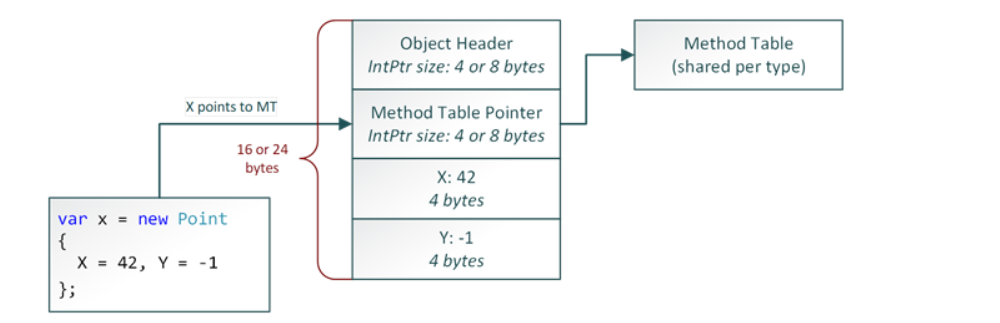



У класса System.Object 3 виртуальных метода:
* Equals
* GetHashCode
* ToString

## Структуры

```c#
public class SomeClass
{
    public SomeStruct SomeValue;
    public OtherClass Other;
}

public struct SomeStruct
{
    public int Value;
    public double Delta;
    public SomeClass Other;
}
```

![](structs1.png)

Структуры, по крайней мере обычные, всегда копируются (defense copy)

```c#
OtherClass A = new OtherClass();
SomeClass B = new SomeClass();

SomeStruct C = new SomeStruct();
C.Other = B;
A.SomeValue = C;
```

![](structs2.png)

### Unmanaged Types (неуправляемые типы)

Тип является unmanaged, если он принадлежит к одному из следующих типов:

* Численный тип: byte, short, int, float, char ...
* Любой тип перечисления (Enum);
* Любой тип указателя (подразумевается IntPtr)
* Любой определяемый пользователем тип структуры , содержащий `только` поля неуправляемых типов.
* Bool и decimal $*$

https://devblogs.microsoft.com/premier-developer/performance-implications-of-default-struct-equality-in-c/

## Boxing / Unboxing

Еще у структур есть возможность попасть ~~в коробку~~ в кучу.

```c#
public struct StructA { double A;}
public struct StructB { int B;}

...

public object FunnyFunction()
{
    object AB = null;

    if (condition)
    {
        AB = new A();
    }
    else
    {
        AB = new B();
    }

    // размер AB?
    // Не протухнет?
    return AB;
}
```

Еще пример:

```c#
int i = 0;
object iBoxed = (object) i;

i = 100500;
int unBoxed = (int) i;

Console.WriteLine(i);       // 100500;
Console.WriteLine(unBoxed); // ???
```
Про интерфейсы и структуры:
```c#
public struct Person : IDoSomething
{
    public int Value;
    public bool DoSomething() { ... }
}

public bool Action(IDoSomething entity) // BOXED !!!
{
    return DoSomething();
}

// public static void WriteLine(object o);
Console.WriteLine(Person);
```

## Оператор as, is и C-casting

* C-casting при несовпадении типа кидает эксепшен. Олд скул.
* as - тоже самое что C-casting, только не кидает эксепшен. Используйте если вы полностью уверены что можете скастовать тип корректно. Иначе юзайте is.
* is - если можно привести тип, то возвращает true, иначе false. Приятный синтаксис идет вместе с ним. Лучше всего использовать именно его.

```c# 
if (iBoxed is int value)
{
    // Do something with value
}
```

## Секция с вопросами
// TODO